# Comparing Edge Detection Methods

There are many distinct edge detection techniques out there and if you've ever asked how they compare with each other then you've come to the correct location, so let's compare them.
We will implement some of the most commonly used methods and also use OpenCV and PIL techniques

Let's compare the following techniques

#1. **Sobel edge detector**
#2. **Prewitt edge detector**
#3. **Laplacian edge detector**
#4. **Canny edge detector**

# <font color=red>**1. Sobel Operator**</font>

Sobel Operator The sobel is one of the most frequently used edge detectors. It is focused on convolving the picture in horizontal and vertical orientation with a tiny, separable, and integer-valued filter and is therefore comparatively cheap in terms of computations. The Sobel image improvement filter has the benefit of simultaneously offering differentiation (which provides the edge reaction) and smoothing (which decreases noise).

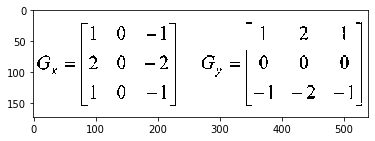

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
sobel=plt.imread("sobel.png")
plt.imshow(sobel)

<font color=green>**Consider the following image:**</font>

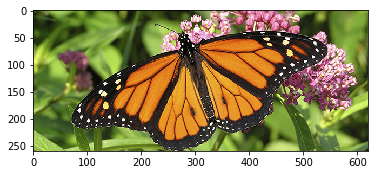

In [3]:
monarch=plt.imread("img/monarch1.jpg")
plt.imshow(monarch)

## <font color=blue>**Sobel Python code**</font>

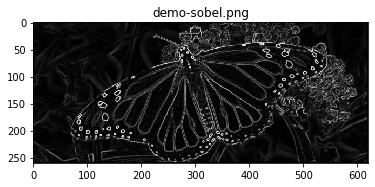

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# Open the image
img = np.array(Image.open('img/monarch1.jpg')).astype(np.uint8)
#plt.imshow(img)
# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Sobel Operator
h, w = gray_img.shape

# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newhorizontalImage = np.zeros((h, w))
newverticalImage = np.zeros((h, w))
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        newverticalImage[i - 1, j - 1] = abs(verticalGrad)

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag

plt.figure()
plt.title('demo-sobel.png')
plt.imsave('edge/monarch1_sobel.png', newgradientImage, cmap='gray', format='png')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

We first add gray scale to the picture in the section above, then we identify our masks for horizontal and vertical passes, then we run over the picture and calculate the gradients.

In this instance, we add the mask to the gray-scale picture, but we can generate a stronger outcome by adding the mask to each RGB channel.

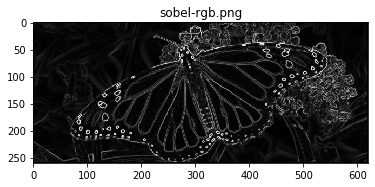

In [5]:
# Open the image
img = np.array(Image.open('img/monarch1.jpg')).astype(np.uint8)

# Sobel Operator
h, w, d = img.shape

# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newgradientImage = np.zeros((h, w, d))

# offset by 1
for channel in range(d):
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            horizontalGrad = (horizontal[0, 0] * img[i - 1, j - 1, channel]) + \
                             (horizontal[0, 1] * img[i - 1, j, channel]) + \
                             (horizontal[0, 2] * img[i - 1, j + 1, channel]) + \
                             (horizontal[1, 0] * img[i, j - 1, channel]) + \
                             (horizontal[1, 1] * img[i, j, channel]) + \
                             (horizontal[1, 2] * img[i, j + 1, channel]) + \
                             (horizontal[2, 0] * img[i + 1, j - 1, channel]) + \
                             (horizontal[2, 1] * img[i + 1, j, channel]) + \
                             (horizontal[2, 2] * img[i + 1, j + 1, channel])

            verticalGrad = (vertical[0, 0] * img[i - 1, j - 1, channel]) + \
                           (vertical[0, 1] * img[i - 1, j, channel]) + \
                           (vertical[0, 2] * img[i - 1, j + 1, channel]) + \
                           (vertical[1, 0] * img[i, j - 1, channel]) + \
                           (vertical[1, 1] * img[i, j, channel]) + \
                           (vertical[1, 2] * img[i, j + 1, channel]) + \
                           (vertical[2, 0] * img[i + 1, j - 1, channel]) + \
                           (vertical[2, 1] * img[i + 1, j, channel]) + \
                           (vertical[2, 2] * img[i + 1, j + 1, channel])

            # Edge Magnitude
            mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
            # Avoid underflow: clip result
            newgradientImage[i - 1, j - 1, channel] = mag

# now add the images r g and b
rgb_edge = newgradientImage[:,:,0] + newgradientImage[:,:,1] + newgradientImage[:,:,2]

plt.figure()
plt.title('sobel-rgb.png')
plt.imsave('edge/monarch1-sobel-rgb.png', rgb_edge, cmap='gray', format='png')
plt.imshow(rgb_edge, cmap='gray')
plt.show()

Now, you can observe a slight improvement in the edge detetction

# <font color=red>**2. Prewitt’s Operator**</font>

Prewitt operator is similar to the Sobel operator and is used to detect vertical and horizontal edges in images. Unlike the Sobel, however, this technique does not position any emphasis on the images nearer to the mask's middle.

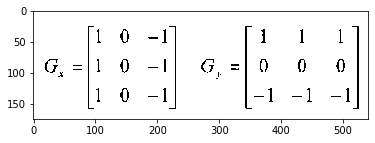

In [6]:
prewitt=plt.imread("Prewitts.png")
plt.imshow(prewitt)

## <font color=blue>**Prewitt’s Python code**</font>

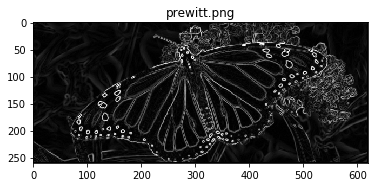

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open('img/monarch1.jpg')).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Prewitt Operator
h, w = gray_img.shape
# define filters
horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # s1

# define images with 0s
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag


plt.figure()
plt.title('prewitt.png')
plt.imsave('edge/prewitt.png', newgradientImage, cmap='gray', format='png')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

# <font color=red>**3. Laplacian Operator**</font>

Laplacian is somewhat distinct from the techniques we've discussed so far. Unlike the edge detectors of Sobel and Prewitt, the Laplacian edge detector utilizes only one kernel. It calculates second-order derivatives in a single run. Two frequently used kernels are:

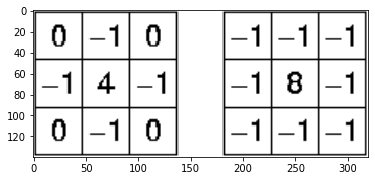

In [8]:
laplacian=plt.imread("Laplacian.png")
plt.imshow(laplacian)

## <font color=blue>**Laplacian Python code**</font>

Because these masks approximate a second derivative test on the picture, they are very susceptible to noise.
To correct this, the picture is often washed Gaussian before implementing the Laplacian filter.

We can also convolve gauussian mask with the Laplacian matrix and add it in one step to the picture.
However, in the previous instance, we will apply them individually. We will use OpenCV to create things simpler.

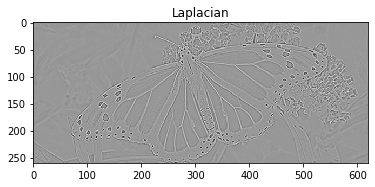

In [9]:
import cv2
import matplotlib.pyplot as plt

# Open the image
img = cv2.imread('img/monarch1.jpg')

# Apply gray scale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply gaussian blur
blur_img = cv2.GaussianBlur(gray_img, (3, 3), 0)

# Positive Laplacian Operator
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)

plt.figure()
plt.title('Laplacian')
plt.imsave('Laplacian.png', laplacian, cmap='gray', format='png')
plt.imshow(laplacian, cmap='gray')
plt.show()

# <font color=red>**4. Canny Operator**</font>

Canny edge detector is likely the most widely used and most efficient technique, it can have its own tutorial because it is much more complicated edge detection technique than the ones outlined above. I will attempt to create it brief and simple to comprehend, though.

#1. Smooth the image with a Gaussian filter to reduce noise.
#2. Compute gradient of using any of the gradient operators Sobel or Prewitt.
#3. Extract edge points: Non-maximum suppression.
#4. Linking and thresholding: Hysteresis

First two steps are very straight forward, note that in the second step we are also computing the orientation of gradients <br> **“theta = arctan(Gy / Gx)”** <br> **Gy** and **Gx** are gradient **x** direction and **y** direction respectively.

Now let's speak about Non-Maximum Suppression and what it is doing. In this phase, we are attempting to relate the edge path to a path that can be plotted along the corners depending on the gradient strengths and edge lengths earlier calculated. We have four feasible instructions at each pixel place. We inspect all instructions if there is a peak gradient at this stage. The perpendicular pixel scores are contrasted with the price in the direction of the border. If their valuation is smaller than the border pixel, they will be lost. After this phase we will get broken thin surfaces that need to be corrected, so let's proceed on to the next phase

Hysteresis is a way to link the broken lines generated in the past phase. This is performed by iterating over the pixels and testing whether the present pixel is an edge. If it's an edge then inspect the corners of the adjacent region. If they have the same direction, we will mark them as an edge pixel. We also use 2 thresholds, one elevated and one low. If the pixels are greater than the lower threshold, it is marked as an edge. Then images that are higher than the smaller limit and also higher than the elevated threshold are also chosen as powerful border screens. If there are no more modifications to the picture, we will stop

## <font color=blue>**Canny Python code**</font>

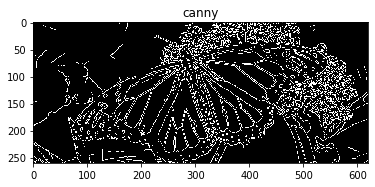

In [10]:
import cv2
import matplotlib.pyplot as plt

# Open the image
img = cv2.imread('img/monarch1.jpg')

# Apply Canny
edges = cv2.Canny(img, 100, 200, 3, L2gradient=True)

plt.figure()
plt.title('canny')
plt.imsave('canny.png', edges, cmap='gray', format='png')
plt.imshow(edges, cmap='gray')
plt.show()

Let us see the edge detection in order
**original image**
**Sobel edge detector**
**Sobel-rgb edge detector**
**Prewitt edge detector**
**Laplacian edge detector**
**Canny edge detector**

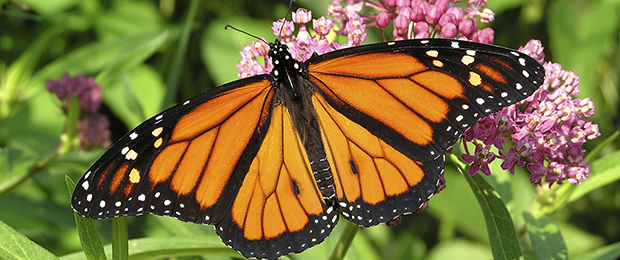

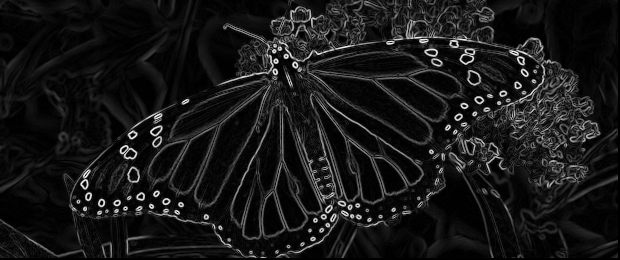

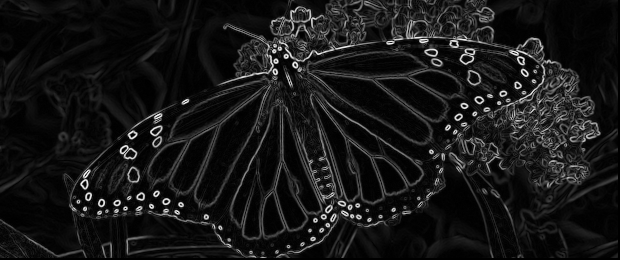

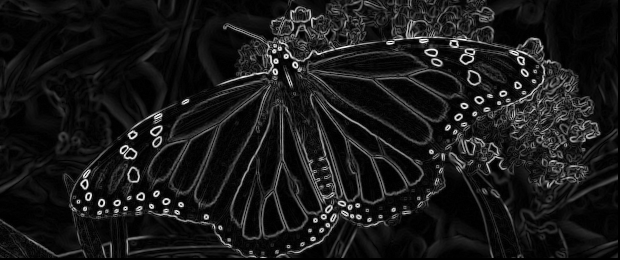

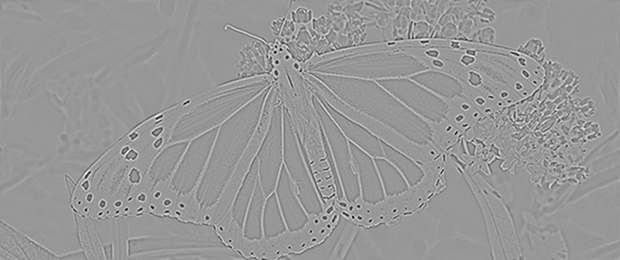

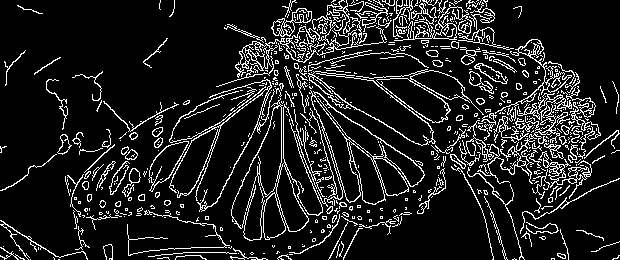

In [20]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='edge/monarch1.jpg') 
y = Image(filename='edge/1.sobel.png')
a = Image(filename='edge/2.sobel-rgb.png')
b = Image(filename='edge/3.prewitt.png')
c = Image(filename='edge/4.laplacian.png')
d = Image(filename='edge/5.canny.png')
display(x, y, a, b, c, d)

**Read more at:**
[Link_1](https://stackoverflow.com/questions/22064982/edge-detection-method-better-than-canny-edge-detection)
[Link_2](https://divtechnosys.com/edge-detection-using-python/)
[Link_3](https://blog.sicara.com/opencv-edge-detection-tutorial-7c3303f10788)
[Link_4](https://www.pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/)